# Understanding The Data
[Kaggle - eCommerce behavior data from multi category store](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store)

This is how the data is being read:
> User `user_id` during session `user_session` added to shopping cart (property `event_type` is equal `cart`) product `product_id` of brand `brand` of category `category_code` (categorycode) with price `price` at `event_time`

**E-commerce (electronic commerce) business** is an online interaction of commodities transaction (buying or selling). Contemporary e-commerce can be classified into two categories: (1) business based on types of goods sold (involves everything from ordering "digital" content for immediate online consumption, to ordering conventional goods and services, to "meta" services to facilitate other types of e-commerce), and (2) based on the nature of the participant (B2B, B2C, C2B and C2C). On the institutional level, big corporations and financial institutions use the internet to exchange financial data to facilitate domestic and international business. Data integrity and security are pressing issues for e-commerce.

Every single transaction we made on e-commerce are producing a large amount of data, which termed as **behavioural data**, as human behaviour is a major source of data in the current digital economy. At the same time, it is also one of the main 'objects' of data science in the sense that many data science and artificial intelligence models are aimed at influencing human behaviour (e.g. through 'nudging', personalisation, and behavioural segmentation). So, behavioural data is important for predict and enhance the performance of a company.

Based on **Kaggle's dataset** link given above, we could determine some business question using the data that we need to answer, such as:
1. How is the trend of the daily web visit?
2. How is the trend of the daily visitors?
3. How is the performance of the web conversion?



# Data Reading 

Read `2019-Oct.csv` form folder `data_file` 

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#user defined functions
def extract_categorycode(input_text,level=0):
    '''
     this function splits category code and returns the first part.
    '''
    output_text=input_text.split('.')[level]
    return output_text

def create_clusters(input_data_frame,input_columns,n_cluster):
    '''
     This function creates clusters and cluster labels.
    '''
    from sklearn.cluster import KMeans
    X=input_data_frame[input_columns].values
    k_means=KMeans(n_clusters=n_cluster,random_state=15).fit(X)
    return k_means.labels_

In [ ]:
# preparation - mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# preparation - check the path
!pwd

/content


In [ ]:
# preparation - change folder
%cd '/content/drive/My Drive/Data Science/data_file'

/content/drive/.shortcut-targets-by-id/1t8EkfV-chB44rwwHoMuk27bpM9uQIAqz/data_file


In [ ]:
# preparation - check file in folder
!ls

 2019-Nov.csv	      'property data.csv'
 2019-Nov.pkl	       quiz_data.json
 2019-Oct.csv	       student_grade_prediction.xlsx
 2019-Oct.yaml	       student-mat.csv
 data_student.pkl      USA_Housing.csv
 earthquake_data.csv   USA_Housing.gsheet
 melb_data.csv	       WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
# pandas read csv
df = pd.read_csv('2019-Oct.csv')
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


# Data Preparation
Drop some column as we can't obtain any insight form this column: `product_id`, `category_id`,  and `user_session`


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(42448764, 9)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
df.drop(columns=['category_id'],inplace=True)
df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)
df['event_type']=df['event_type'].astype('category')
df['category_code']=df['category_code'].astype('category')

In [ ]:
df.head(5)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


#General Summary
lets dig in the data to answer three questions above

In [ ]:
#creating a summary table for general overview
daily_summary_table=df.groupby(by=[df['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=df['event_type']=='purchase'
sales=df.loc[sales_filter].groupby(by=[df['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

## How is the trend of the daily web visit?
this will give us information about how much the web is being visited every day

Daily Visits Statistics
--------------------------------------------------
count        31.000000
mean     299510.548387
std       25531.553700
min      241086.000000
25%      278957.500000
50%      301219.000000
75%      319668.500000
max      339943.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
            count       mean           std  ...       50%        75%       max
event_time                                  ...                               
Friday        4.0  321772.50  16017.261304  ...  325731.0  333799.50  334977.0
Monday        4.0  293353.00  26033.151442  ...  294346.5  311089.50  321282.0
Saturday      4.0  298041.75  19140.215435  ...  296976.5  308605.50  321300.0
Sunday        4.0  309080.00  32756.353552  ...  311671.5  335116.75  339943.0
Thursday      5.0  282820.60  24557.356776  ...  293587.0  295142.00  302842.0
Tuesday       5

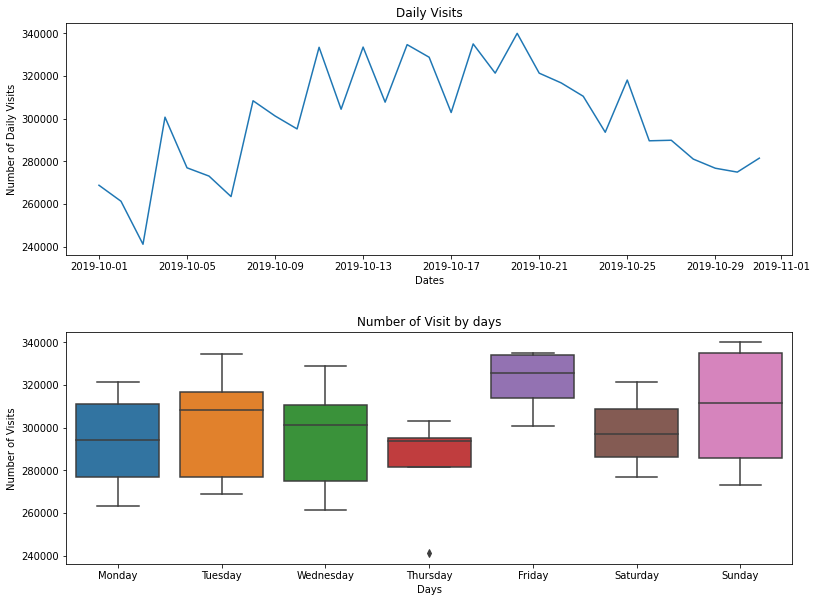

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import warnings
warnings.simplefilter("ignore")

#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

## How is the trend of the daily visitors?
this will give us information about how much unique visitors visited the web every day

Daily Visitor Statistics
--------------------------------------------------
count        31.000000
mean     208829.774194
std       16233.609920
min      170668.000000
25%      195260.500000
50%      208477.000000
75%      223321.000000
max      231849.000000
Name: Number_of_daily_visitors, dtype: float64
--------------------------------------------------
Visitor Statistics by Dates
--------------------------------------------------
            count       mean           std  ...       50%        75%       max
event_time                                  ...                               
Friday        4.0  223166.00   9715.295466  ...  226360.5  229730.50  230533.0
Monday        4.0  204218.00  16732.498877  ...  202326.0  213134.00  225269.0
Saturday      4.0  205851.25   9731.790975  ...  205263.5  210746.25  217920.0
Sunday        4.0  213090.00  18707.438325  ...  213650.5  227418.75  231849.0
Thursday      5.0  197994.80  15736.888740  ...  205321.0  206937.00  208477.0
Tuesday   

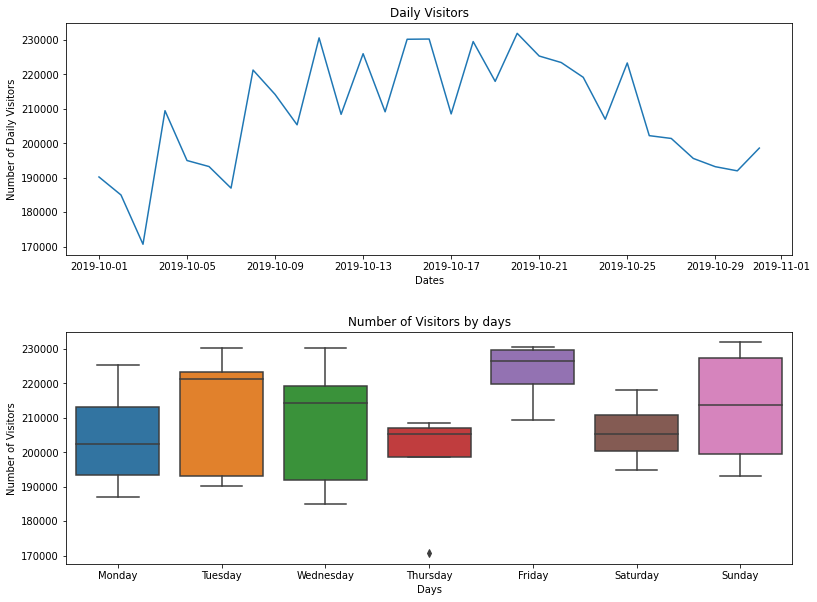

In [19]:
#Daily Visitors
print('Daily Visitor Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('-'*50)
print('Visitor Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visitors'].describe())

#Plotting number of daily visitors
fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visitors',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

## How is the performance of the web conversion?
this will give us information about percentage of the buying visitors compared to the total visitors every day

Conversion Rates Statistics
--------------------------------------------------
count    31.000000
mean      0.079895
std       0.006343
min       0.071413
25%       0.075183
50%       0.078655
75%       0.081473
max       0.095497
Name: conversion_rate, dtype: float64
--------------------------------------------------
Conversion Rates Statistics by Dates
--------------------------------------------------
            count      mean       std  ...       50%       75%       max
event_time                             ...                              
Friday        4.0  0.080250  0.006611  ...  0.077912  0.081476  0.089941
Monday        4.0  0.081733  0.007472  ...  0.079742  0.083942  0.092316
Saturday      4.0  0.080793  0.003915  ...  0.080794  0.083732  0.084842
Sunday        4.0  0.081104  0.006049  ...  0.080974  0.083061  0.088637
Thursday      5.0  0.080210  0.008501  ...  0.079868  0.081744  0.093508
Tuesday       5.0  0.075850  0.003511  ...  0.074825  0.078805  0.080153
Wednesda

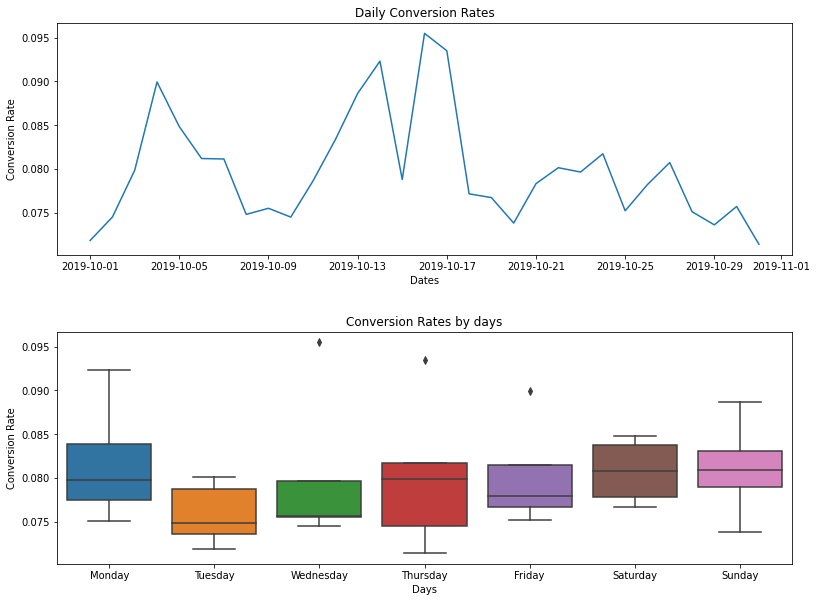

In [20]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

#Plotting convergance rates
fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='conversion_rate',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='conversion_rate',
            data=daily_summary_table,
           ax=ax2)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);